<a href="https://colab.research.google.com/github/anishchapagain/AnishPython/blob/master/share_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create two dictionaries to store data from the sources

data_aasira = {
    'Scrip': ['GBD80/81', 'HLI', 'LSL', 'NBF2', 'NICAD85/86', 'NICBF', 'NICLBSL', 'NIFRA', 'NIMB', 'NRIC', 'NRN', 'PBD88', 'PMLI', 'RFPL', 'RHPL', 'SAHAS', 'SANIMA', 'SBCF', 'SBL', 'SJCL', 'SJLIC', 'SRLI', 'UAIL', 'UPCL'],
    'Current Balance': [25.0, 27.0, 25.0, 2500.0, 25.0, 500.0, 10.0, 54.0, 28.0, 51.0, 10.0, 100.0, 10.0, 10.0, 40.0, 10.0, 30.0, 1000.0, 28.0, 20.0, 10.0, 10.0, 9.0, 54.0],
    'LTP': [1040.0, 450.0, 235.0, 9.8, 1020.0, 9.84, 804.8, 248.7, 254.0, 839.1, 989.0, 1025.0, 594.0, 425.0, 419.0, 639.1, 344.0, 9.11, 343.5, 367.4, 492.0, 516.1, 692.0, 259.9]
}

data_anish = {
    'Scrip': ['ADBLD83', 'BHL', 'BOKD86', 'CMF2', 'EBLD85', 'GBILD84/85', 'HBLD86', 'HIDCL', 'HRL', 'IHL', 'ILBS', 'KBL', 'KBLD89', 'LEC', 'LUK', 'MBLD87', 'MEL', 'MFLD85', 'MLBLD89', 'MMF1', 'NABILD87', 'NBBD2085', 'NBF2', 'NBLD85', 'NEF', 'NFCF', 'NIBLSF', 'NIBLSTF', 'NIBSF2', 'NICAD85/86', 'NICADF', 'NICBF', 'NICLBSL', 'NIFRA', 'NIMB', 'NIMBD90', 'NLIC', 'NRIC', 'NRN', 'PBD88', 'PMHPL', 'RHPL', 'SAGF', 'SBD87', 'SCB', 'SCBD', 'SFEF', 'SGIC', 'SIGS2', 'SJCL', 'SJLIC', 'SLCF', 'SONA', 'SRBLD83', 'SRLI', 'UNHPL', 'UPPER'],
    'Current Balance': [75.0, 10.0, 35.0, 1000.0, 55.0, 62.0, 45.0, 362.0, 10.0, 10.0, 19.0, 427.0, 55.0, 40.0, 2000.0, 40.0, 10.0, 50.0, 50.0, 3500.0, 25.0, 42.0, 2500.0, 100.0, 2414.0, 260.0, 1700.0, 3500.0, 1000.0, 53.0, 1000.0, 1500.0, 10.0, 54.0, 508.0, 50.0, 33.0, 64.0, 10.0, 45.0, 10.0, 20.0, 1750.0, 60.0, 23.0, 45.0, 500.0, 10.0, 2000.0, 20.0, 10.0, 3900.0, 10.0, 55.0, 20.0, 50.0, 100.0],
    'LTP': [1081.0, 425.0, 951.0, 9.7, 1090.0, 1155.0, 1112.3, 214.5, 695.3, 538.4, 1220.0, 220.5, 1141.0, 239.0, 9.99, 969.0, 288.2, 1010.0, 1139.1, 8.5, 999.0, 1205.4, 9.8, 940.0, 9.9, 10, 11.3, 8.87, 8.56, 1020.0, 11.43, 9.84, 804.8, 248.7, 254.0, 1045.0, 826.0, 839.1, 989.0, 1025.0, 282.0, 419.0, 10.0, 941.0, 683.0, 1080.0, 9.22, 695.0, 9.68, 367.4, 492.0, 9.1, 529.9, 1079.0, 516.1, 302.9, 211.0]
}

In [3]:
# Create pandas DataFrames from the dictionaries

df_aasira = pd.DataFrame(data_aasira)
df_anish = pd.DataFrame(data_anish)

In [4]:
# Double the 'Current Balance' column in both DataFrames

df_aasira['Current Balance'] = df_aasira['Current Balance'] * 2
df_anish['Current Balance'] = df_anish['Current Balance'] * 2

In [5]:
# Function to determine investment price

def get_investment_price(row):
  if row['Scrip'][-1].isdigit() and row['LTP'] < 50:
    return row['Current Balance']*10
  elif row['Scrip'][-1].isdigit() and row['LTP'] > 50:
    return row['Current Balance']*1000
  elif row['LTP'] < 50:
    return row['Current Balance']*10
  else:
    return row['Current Balance']*100

# Calculate investment for df_aasira

df_aasira['Investment'] = df_aasira.apply(get_investment_price, axis=1)

# Calculate investment for df_anish

df_anish['Investment'] = df_anish.apply(get_investment_price, axis=1)


In [6]:
# Calculate 'Market Value' for df_aasira
df_aasira['Market Value'] = df_aasira['LTP'] * df_aasira['Current Balance']

# Calculate 'Market Value' for df_anish
df_anish['Market Value'] = df_anish['LTP'] * df_anish['Current Balance']

In [7]:
df_aasira.head(5)

,Scrip,Current Balance,LTP,Investment,Market Value
0,GBD80/81,50.0,1040.0,50000.0,52000.0
1,HLI,54.0,450.0,5400.0,24300.0
2,LSL,50.0,235.0,5000.0,11750.0
3,NBF2,5000.0,9.8,50000.0,49000.0
4,NICAD85/86,50.0,1020.0,50000.0,51000.0


In [8]:
df_anish.head(5)

,Scrip,Current Balance,LTP,Investment,Market Value
0,ADBLD83,150.0,1081.0,150000.0,162150.0
1,BHL,20.0,425.0,2000.0,8500.0
2,BOKD86,70.0,951.0,70000.0,66570.0
3,CMF2,2000.0,9.7,20000.0,19400.0
4,EBLD85,110.0,1090.0,110000.0,119900.0


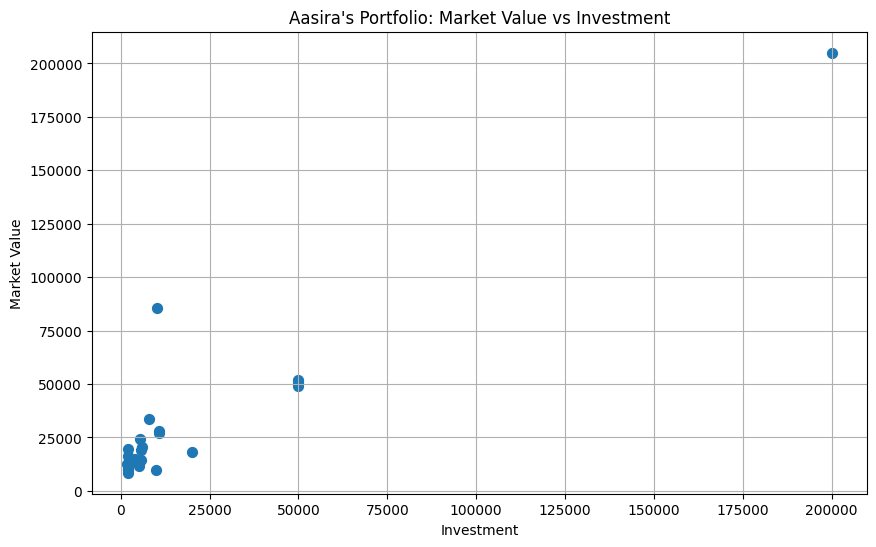

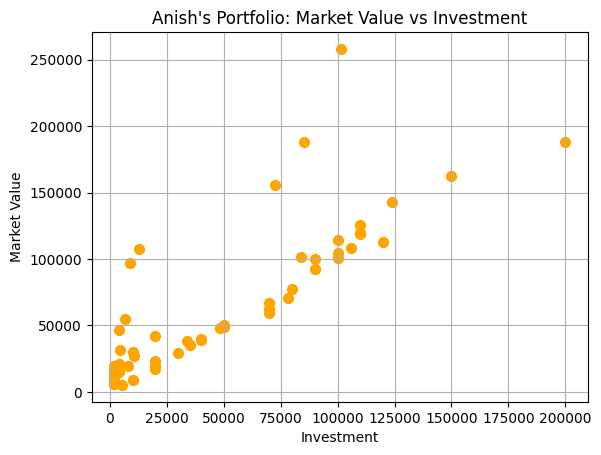

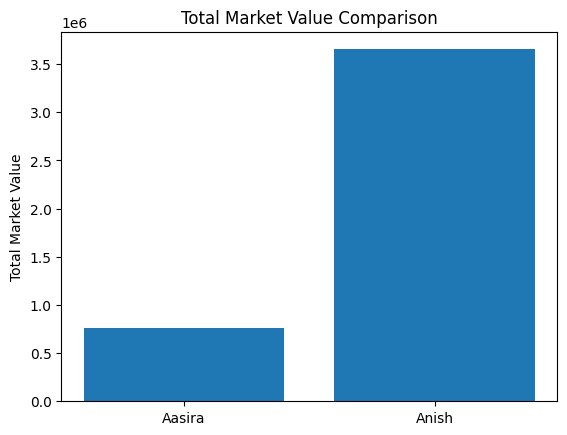

In [9]:
# Scatter plot for Aasira's portfolio
plt.figure(figsize=(10, 6))
plt.scatter(df_aasira['Investment'], df_aasira['Market Value'], s=50)
plt.xlabel('Investment')
plt.ylabel('Market Value')
plt.title("Aasira's Portfolio: Market Value vs Investment")
plt.grid(True)
plt.show()

# Scatter plot for Anish's portfolio
plt.scatter(df_anish['Investment'], df_anish['Market Value'], s=50, color='orange')
plt.xlabel('Investment')
plt.ylabel('Market Value')
plt.title("Anish's Portfolio: Market Value vs Investment")
plt.grid(True)
plt.show()

# Bar chart comparing total market value
total_market_value = [df_aasira['Market Value'].sum(), df_anish['Market Value'].sum()]
plt.bar(['Aasira', 'Anish'], total_market_value)
plt.ylabel('Total Market Value')
plt.title('Total Market Value Comparison')
plt.show()


In [10]:
# Few features

print("DataFrame 'df_aasira'")
print("Length:", len(df_aasira))
print("Unique Values:", df_aasira.nunique())
print("High:", df_aasira.max())
print("Low:", df_aasira.min())

print("\nDataFrame 'df_anish'")
print("Length:", len(df_anish))
print("Unique Values:", df_anish.nunique())
print("High:", df_anish.max())
print("Low:", df_anish.min())


DataFrame 'df_aasira'
Length: 24
Unique Values: Scrip              24
Current Balance    14
LTP                24
Investment         14
Market Value       23
dtype: int64
High: Scrip                  UPCL
Current Balance      5000.0
LTP                  1040.0
Investment         200000.0
Market Value       205000.0
dtype: object
Low: Scrip              GBD80/81
Current Balance        18.0
LTP                    9.11
Investment           1800.0
Market Value         8500.0
dtype: object

DataFrame 'df_anish'
Length: 57
Unique Values: Scrip              57
Current Balance    33
LTP                56
Investment         33
Market Value       57
dtype: int64
High: Scrip                 UPPER
Current Balance      7800.0
LTP                  1220.0
Investment         200000.0
Market Value       258064.0
dtype: object
Low: Scrip              ADBLD83
Current Balance       20.0
LTP                    8.5
Investment          2000.0
Market Value        5200.0
dtype: object


In [11]:
# Get all scrips from both dataframes

all_scrips = pd.concat([df_aasira['Scrip'], df_anish['Scrip']]).unique()

sorted_scrips = sorted(all_scrips)

print(sorted_scrips)

['ADBLD83', 'BHL', 'BOKD86', 'CMF2', 'EBLD85', 'GBD80/81', 'GBILD84/85', 'HBLD86', 'HIDCL', 'HLI', 'HRL', 'IHL', 'ILBS', 'KBL', 'KBLD89', 'LEC', 'LSL', 'LUK', 'MBLD87', 'MEL', 'MFLD85', 'MLBLD89', 'MMF1', 'NABILD87', 'NBBD2085', 'NBF2', 'NBLD85', 'NEF', 'NFCF', 'NIBLSF', 'NIBLSTF', 'NIBSF2', 'NICAD85/86', 'NICADF', 'NICBF', 'NICLBSL', 'NIFRA', 'NIMB', 'NIMBD90', 'NLIC', 'NRIC', 'NRN', 'PBD88', 'PMHPL', 'PMLI', 'RFPL', 'RHPL', 'SAGF', 'SAHAS', 'SANIMA', 'SBCF', 'SBD87', 'SBL', 'SCB', 'SCBD', 'SFEF', 'SGIC', 'SIGS2', 'SJCL', 'SJLIC', 'SLCF', 'SONA', 'SRBLD83', 'SRLI', 'UAIL', 'UNHPL', 'UPCL', 'UPPER']


In [12]:
# Filter scrips ending with a number and their current balance

scrips_ending_with_number = []
current_balance = []

for scrip in all_scrips:
  if scrip[-1].isdigit():
    scrips_ending_with_number.append(scrip)
    # Check if scrip is in df_aasira or df_anish and get current balance
    if scrip in df_aasira['Scrip'].values:
      current_balance.append(df_aasira.loc[df_aasira['Scrip'] == scrip, 'Current Balance'].iloc[0])
    elif scrip in df_anish['Scrip'].values:
      current_balance.append(df_anish.loc[df_anish['Scrip'] == scrip, 'Current Balance'].iloc[0])

# Create a DataFrame from the filtered data
df_filtered = pd.DataFrame({'Scrip': scrips_ending_with_number, 'Current Balance': current_balance})

print(df_filtered)


         Scrip  Current Balance
0     GBD80/81             50.0
1         NBF2           5000.0
2   NICAD85/86             50.0
3        PBD88            200.0
4      ADBLD83            150.0
5       BOKD86             70.0
6         CMF2           2000.0
7       EBLD85            110.0
8   GBILD84/85            124.0
9       HBLD86             90.0
10      KBLD89            110.0
11      MBLD87             80.0
12      MFLD85            100.0
13     MLBLD89            100.0
14        MMF1           7000.0
15    NABILD87             50.0
16    NBBD2085             84.0
17      NBLD85            200.0
18      NIBSF2           2000.0
19     NIMBD90            100.0
20       SBD87            120.0
21       SIGS2           4000.0
22     SRBLD83            110.0


## Market calculations

### Calculate Investment, Market Value, and Profit/Loss

In [13]:
df_aasira['Investment'] = df_aasira['Current Balance'] * df_aasira['LTP']
df_aasira['Market Value'] = df_aasira['Current Balance'] * df_aasira['LTP']  # Assuming current balance is the same as the number of shares held
df_aasira['Profit/Loss'] = df_aasira['Market Value'] - df_aasira['Investment']

In [14]:
# Display the DataFrame with calculations
print(df_aasira)

         Scrip  Current Balance      LTP  Investment  Market Value  \
0     GBD80/81             50.0  1040.00     52000.0       52000.0   
1          HLI             54.0   450.00     24300.0       24300.0   
2          LSL             50.0   235.00     11750.0       11750.0   
3         NBF2           5000.0     9.80     49000.0       49000.0   
4   NICAD85/86             50.0  1020.00     51000.0       51000.0   
5        NICBF           1000.0     9.84      9840.0        9840.0   
6      NICLBSL             20.0   804.80     16096.0       16096.0   
7        NIFRA            108.0   248.70     26859.6       26859.6   
8         NIMB             56.0   254.00     14224.0       14224.0   
9         NRIC            102.0   839.10     85588.2       85588.2   
10         NRN             20.0   989.00     19780.0       19780.0   
11       PBD88            200.0  1025.00    205000.0      205000.0   
12        PMLI             20.0   594.00     11880.0       11880.0   
13        RFPL      

### Plotting

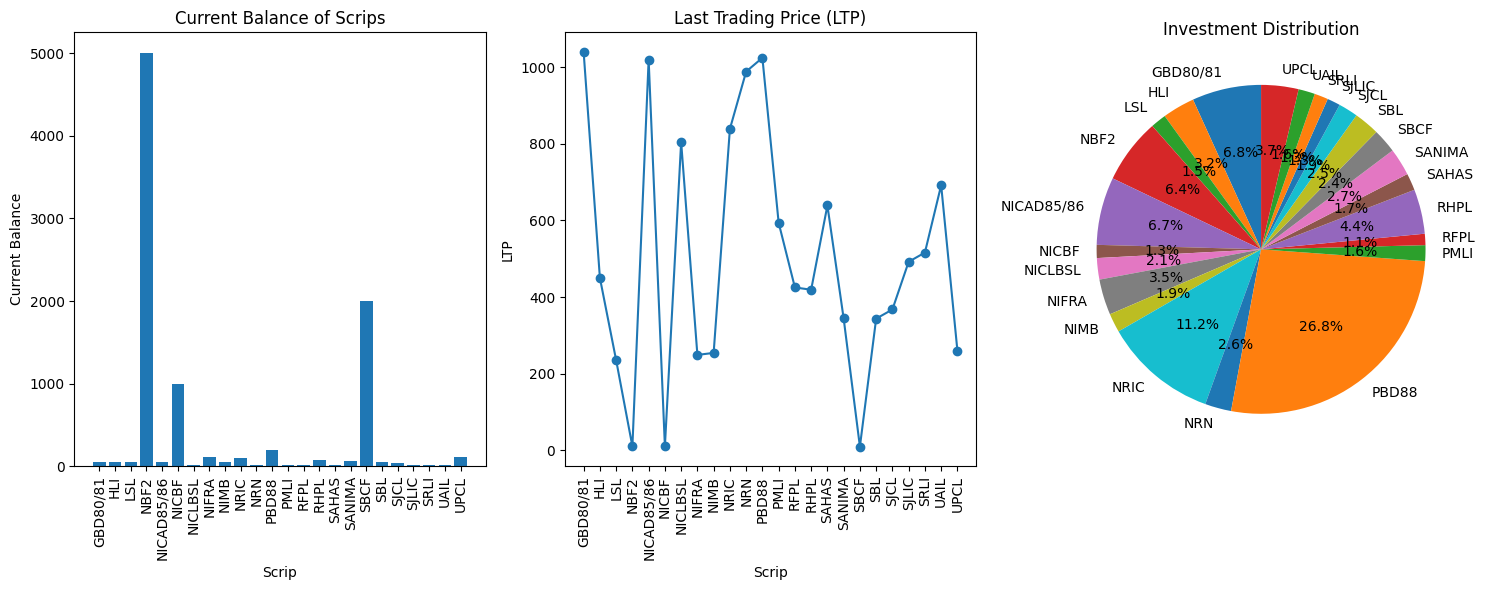

In [15]:
plt.figure(figsize=(15, 6))

# Bar chart for Current Balance

plt.subplot(1, 3, 1)
plt.bar(df_aasira['Scrip'], df_aasira['Current Balance'])
plt.xlabel('Scrip')
plt.ylabel('Current Balance')
plt.title('Current Balance of Scrips')
plt.xticks(rotation=90)

# Line chart for LTP
plt.subplot(1, 3, 2)
plt.plot(df_aasira['Scrip'], df_aasira['LTP'], marker='o')
plt.xlabel('Scrip')
plt.ylabel('LTP')
plt.title('Last Trading Price (LTP)')
plt.xticks(rotation=90)

# Pie chart for Investment Distribution
plt.subplot(1, 3, 3)
plt.pie(df_aasira['Investment'], labels=df_aasira['Scrip'], autopct='%1.1f%%', startangle=90)
plt.title('Investment Distribution')

plt.tight_layout()
plt.show()

## Comparing aasira and anish shares

In [16]:
# 1. Find common scrips:

common_scrips = list(set(df_aasira['Scrip']).intersection(df_anish['Scrip']))
print("Common Scrips:", common_scrips)

Common Scrips: ['NIFRA', 'NICBF', 'SRLI', 'NRN', 'NBF2', 'SJCL', 'NICAD85/86', 'PBD88', 'SJLIC', 'NICLBSL', 'RHPL', 'NRIC', 'NIMB']


In [17]:
# 2. Compare LTP of common scrips:

df_comparison = pd.DataFrame(index=common_scrips, columns=['Aasira LTP', 'Anish LTP'])
for scrip in common_scrips:
  df_comparison.loc[scrip, 'Aasira LTP'] = df_aasira.loc[df_aasira['Scrip'] == scrip, 'LTP'].values[0]
  df_comparison.loc[scrip, 'Anish LTP'] = df_anish.loc[df_anish['Scrip'] == scrip, 'LTP'].values[0]

print("\nLTP Comparison:\n", df_comparison)


LTP Comparison:
            Aasira LTP Anish LTP
NIFRA           248.7     248.7
NICBF            9.84      9.84
SRLI            516.1     516.1
NRN             989.0     989.0
NBF2              9.8       9.8
SJCL            367.4     367.4
NICAD85/86     1020.0    1020.0
PBD88          1025.0    1025.0
SJLIC           492.0     492.0
NICLBSL         804.8     804.8
RHPL            419.0     419.0
NRIC            839.1     839.1
NIMB            254.0     254.0


In [18]:
# 3. Identify scrips with higher LTP in each portfolio:

df_comparison['Higher in'] = df_comparison.apply(lambda row: 'Aasira' if row['Aasira LTP'] > row['Anish LTP'] else ('Anish' if row['Anish LTP'] > row['Aasira LTP'] else 'Equal'), axis=1)
print("\nScrips with Higher LTP:\n", df_comparison)


Scrips with Higher LTP:
            Aasira LTP Anish LTP Higher in
NIFRA           248.7     248.7     Equal
NICBF            9.84      9.84     Equal
SRLI            516.1     516.1     Equal
NRN             989.0     989.0     Equal
NBF2              9.8       9.8     Equal
SJCL            367.4     367.4     Equal
NICAD85/86     1020.0    1020.0     Equal
PBD88          1025.0    1025.0     Equal
SJLIC           492.0     492.0     Equal
NICLBSL         804.8     804.8     Equal
RHPL            419.0     419.0     Equal
NRIC            839.1     839.1     Equal
NIMB            254.0     254.0     Equal


In [19]:
# Calculate sum of 'Current Balance' for common scrips in both DataFrames
sum_aasira = df_aasira[df_aasira['Scrip'].isin(common_scrips)]['Current Balance'].sum()
sum_anish = df_anish[df_anish['Scrip'].isin(common_scrips)]['Current Balance'].sum()

print("Sum of Current Balance for common scrips in df_aasira:", sum_aasira)
print("Sum of Current Balance for common scrips in df_anish:", sum_anish)


Sum of Current Balance for common scrips in df_aasira: 6716.0
Sum of Current Balance for common scrips in df_anish: 9628.0


In [20]:
#Scrips with potential profit (LTP > Purchase Price):

df_aasira['Potential Profit'] = df_aasira['LTP'] - df_aasira['Investment'] / df_aasira['Current Balance']  # Assuming purchase price is Investment / Current Balance
df_anish['Potential Profit'] = df_anish['LTP'] - df_anish['Investment'] / df_anish['Current Balance']

profitable_scrips_aasira = df_aasira[df_aasira['Potential Profit'] > 0]['Scrip'].tolist()
profitable_scrips_anish = df_anish[df_anish['Potential Profit'] > 0]['Scrip'].tolist()

print("\nProfitable scrips for Aasira:", profitable_scrips_aasira)
print("Profitable scrips for Anish:", profitable_scrips_anish)



Profitable scrips for Aasira: []
Profitable scrips for Anish: ['ADBLD83', 'BHL', 'EBLD85', 'GBILD84/85', 'HBLD86', 'HIDCL', 'HRL', 'IHL', 'ILBS', 'KBL', 'KBLD89', 'LEC', 'MEL', 'MFLD85', 'MLBLD89', 'NBBD2085', 'NIBLSF', 'NICAD85/86', 'NICADF', 'NICLBSL', 'NIFRA', 'NIMB', 'NIMBD90', 'NLIC', 'NRIC', 'NRN', 'PBD88', 'PMHPL', 'RHPL', 'SCB', 'SCBD', 'SGIC', 'SJCL', 'SJLIC', 'SONA', 'SRBLD83', 'SRLI', 'UNHPL', 'UPPER']


### Filter and Process

In [21]:
# Filter df_aasira to include scrips ending with number

df_aasira_filtered = df_aasira[df_aasira['Scrip'].str.endswith(tuple(str(i) for i in range(10)))]
df_aasira_filtered

,Scrip,Current Balance,LTP,Investment,Market Value,Profit/Loss,Potential Profit
0,GBD80/81,50.0,1040.0,52000.0,52000.0,0.0,0.0
3,NBF2,5000.0,9.8,49000.0,49000.0,0.0,0.0
4,NICAD85/86,50.0,1020.0,51000.0,51000.0,0.0,0.0
11,PBD88,200.0,1025.0,205000.0,205000.0,0.0,0.0


In [22]:
# Filter dataframes to include only scrips ending with a number

df_anish_filtered = df_anish[df_anish['Scrip'].str.endswith(tuple(str(i) for i in range(10))]
df_anish_filtered

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (<ipython-input-22-814c2cdc57a9>, line 3)

In [ ]:
# Merge the two dataframes on the 'Scrip' column

merged_df = pd.merge(df_aasira_filtered, df_anish_filtered, on='Scrip', suffixes=('_aasira', '_anish'))

print(merged_df)

plot_df = merged_df[['Scrip', 'Current Balance_aasira', 'Current Balance_anish']]
plot_df.plot

compare_df = merged_df[['Scrip', 'LTP_aasira', 'LTP_anish']]
compare_df.plot


In [ ]:
# Plot the data

plt.figure(figsize=(10, 6))
plt.bar(df_aasira_filtered['Scrip'], df_aasira_filtered['Current Balance'], label='Aasira')
plt.bar(df_anish_filtered['Scrip'], df_anish_filtered['Current Balance'], label='Anish')
plt.xlabel('Scrip')
plt.ylabel('Number of Shares')
plt.title('Number of Shares for Scrips Ending with a Number')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_aasira_filtered['Scrip'], df_aasira_filtered['LTP'], label='Aasira')
plt.plot(df_anish_filtered['Scrip'], df_anish_filtered['LTP'], label='Anish')
plt.xlabel('Scrip')
plt.ylabel('Last Transaction Price (LTP)')
plt.title('LTP for Scrips Ending with a Number')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()